# Flight price prediction

In this project, we aim to predict the prices of flights, based on data collected from March to June 2019.

We have the following input columns -

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

---------------------------------------------------------

Price: The price of the ticket - Output variable

This is a regression problem since the output data is a continuous variable

In [814]:
#Importing the basic necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [815]:
#Loading data from csv file

data = pd.read_excel('Flight_train.xlsx', sheet_name='Sheet1')

In [816]:
data.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6554,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info,6144
3828,IndiGo,9/05/2019,Banglore,Delhi,BLR → DEL,06:05,08:50,2h 45m,non-stop,No info,4077
9979,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,16:10,10h 25m,1 stop,No info,12284
4265,Jet Airways,12/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,23:35,7h 5m,1 stop,No info,14781
5575,IndiGo,12/05/2019,Kolkata,Banglore,CCU → BLR,21:25,00:05 13 May,2h 40m,non-stop,No info,4804
1122,Jet Airways,21/06/2019,Banglore,Delhi,BLR → DEL,11:10,14:05,2h 55m,non-stop,No info,8016
8244,Jet Airways,3/06/2019,Delhi,Cochin,DEL → BOM → COK,07:05,19:00,11h 55m,1 stop,In-flight meal not included,10577
4514,Jet Airways,21/03/2019,Delhi,Cochin,DEL → BOM → COK,17:30,18:50 22 Mar,25h 20m,1 stop,In-flight meal not included,5963
9778,Multiple carriers,9/03/2019,Delhi,Cochin,DEL → BOM → COK,06:50,21:00,14h 10m,1 stop,In-flight meal not included,14086
3587,SpiceJet,09/03/2019,Banglore,New Delhi,BLR → PNQ → DEL,10:20,18:15,7h 55m,1 stop,No info,7294


# Exploratory data analysis and data modeling

In [817]:
#Checking data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Observation -

- We have 10 input variables in our data and 1 output variable - Price
- We have one null value in Route and Total stops column which we will need to fill
- We have majority of the columns as objects, Date of journey, dep_time and arrival time columns are datetime type but are categorized as objects, we will need to treat them.
- Duration should also be int and total stops should be int, these columns would need to be treated.
- We will need to treat Route column to split the data, and will need to check how to use the Additional info column

In [818]:
#Checking data stats

data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### Observation -

Price starts from a min orice of 1759 and max price 79512.
- Majority of the flights are upto ~13000.


- Columns like total stops and duration which should be integers need to be treated as already mentioned above

In [819]:
#Checking NaN value count

data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [820]:
#Creating list of category columns

category = ['Airline','Source','Destination','Additional_Info']

In [821]:
#Checking unique values in Airlines column
for i in category:
    print(i, data[i].unique())
    print('----------------------------------------------')

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
----------------------------------------------
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
----------------------------------------------
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
----------------------------------------------
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
----------------------------------------------


### Observations

- The Airline column has 12 unique values -'IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet'

- Source column has 5 unique values - 'Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai'

- Destination column has 6 unique values - 'New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad'

- Additional info column has 10 unique values, but we can combine 'No info and No Info' since they have only capitalizarion difference.


In [822]:
#Treating the date column

data.Date_of_Journey = data.Date_of_Journey.str.split('/')

In [823]:
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [824]:
data['Date'] = data.Date_of_Journey.str[0]
data['Month'] = data.Date_of_Journey.str[1]
data['Year'] = data.Date_of_Journey.str[2]

In [825]:
data.Date

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date, Length: 10683, dtype: object

We have successfully separated the date, month and year from date column, to feed our model with respective data

In [826]:
# Treating the Route column

data.Route.unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [827]:
data.Route = data.Route.str.split('→')

In [828]:
data.Route

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10683, dtype: object

In [829]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [830]:
#Since max number of stops are 4, there will be maximum 6 cities in the longest route.

#We will divide the route into 6 cities and fill the values

data['City1'] = data.Route.str[0]
data['City2'] = data.Route.str[1]
data['City3'] = data.Route.str[2]
data['City4'] = data.Route.str[3]
data['City5'] = data.Route.str[4]
data['City6'] = data.Route.str[5]

In [831]:
data.City6.value_counts()

 DEL    1
Name: City6, dtype: int64

In [832]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,City4,City5,City6
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]",16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]",19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019,CCU,BLR,NaN,NaN,NaN,NaN
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]",20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019,CCU,BLR,NaN,NaN,NaN,NaN
10680,Jet Airways,"[27, 04, 2019]",Banglore,Delhi,"[BLR , DEL]",08:20,11:20,3h,non-stop,No info,7229,27,04,2019,BLR,DEL,NaN,NaN,NaN,NaN
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019,BLR,DEL,NaN,NaN,NaN,NaN


In [833]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,City4,City5,City6
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]",16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]",19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019,CCU,BLR,NaN,NaN,NaN,NaN
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]",20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019,CCU,BLR,NaN,NaN,NaN,NaN
10680,Jet Airways,"[27, 04, 2019]",Banglore,Delhi,"[BLR , DEL]",08:20,11:20,3h,non-stop,No info,7229,27,04,2019,BLR,DEL,NaN,NaN,NaN,NaN
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019,BLR,DEL,NaN,NaN,NaN,NaN


In [834]:
#Treating dep time column

data.Dep_Time = data.Dep_Time.str.split(':')

In [835]:
data['Dep_Time_Hour'] = data.Dep_Time.str[0]
data['Dep_Time_Min'] = data.Dep_Time.str[1]

In [836]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Month,Year,City1,City2,City3,City4,City5,City6,Dep_Time_Hour,Dep_Time_Min
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]",01:10 22 Mar,2h 50m,non-stop,No info,...,03,2019,BLR,DEL,NaN,NaN,NaN,NaN,22,20
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",13:15,7h 25m,2 stops,No info,...,05,2019,CCU,IXR,BBI,BLR,NaN,NaN,05,50
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]",04:25 10 Jun,19h,2 stops,No info,...,06,2019,DEL,LKO,BOM,COK,NaN,NaN,09,25
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",23:30,5h 25m,1 stop,No info,...,05,2019,CCU,NAG,BLR,NaN,NaN,NaN,18,05
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",21:35,4h 45m,1 stop,No info,...,03,2019,BLR,NAG,DEL,NaN,NaN,NaN,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]","[19, 55]",22:25,2h 30m,non-stop,No info,...,04,2019,CCU,BLR,NaN,NaN,NaN,NaN,19,55
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]","[20, 45]",23:20,2h 35m,non-stop,No info,...,04,2019,CCU,BLR,NaN,NaN,NaN,NaN,20,45
10680,Jet Airways,"[27, 04, 2019]",Banglore,Delhi,"[BLR , DEL]","[08, 20]",11:20,3h,non-stop,No info,...,04,2019,BLR,DEL,NaN,NaN,NaN,NaN,08,20
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[11, 30]",14:10,2h 40m,non-stop,No info,...,03,2019,BLR,DEL,NaN,NaN,NaN,NaN,11,30


In [837]:
#Treating the arrival time column

data.Arrival_Time = data.Arrival_Time.str.split(' ')

In [838]:
data['Arrival_date'] = data.Arrival_Time.str[1]

In [839]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Year,City1,City2,City3,City4,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]","[01:10, 22, Mar]",2h 50m,non-stop,No info,...,2019,BLR,DEL,NaN,NaN,NaN,NaN,22,20,22
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],7h 25m,2 stops,No info,...,2019,CCU,IXR,BBI,BLR,NaN,NaN,05,50,NaN
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]","[04:25, 10, Jun]",19h,2 stops,No info,...,2019,DEL,LKO,BOM,COK,NaN,NaN,09,25,10
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],5h 25m,1 stop,No info,...,2019,CCU,NAG,BLR,NaN,NaN,NaN,18,05,NaN
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],4h 45m,1 stop,No info,...,2019,BLR,NAG,DEL,NaN,NaN,NaN,16,50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]","[19, 55]",[22:25],2h 30m,non-stop,No info,...,2019,CCU,BLR,NaN,NaN,NaN,NaN,19,55,NaN
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]","[20, 45]",[23:20],2h 35m,non-stop,No info,...,2019,CCU,BLR,NaN,NaN,NaN,NaN,20,45,NaN
10680,Jet Airways,"[27, 04, 2019]",Banglore,Delhi,"[BLR , DEL]","[08, 20]",[11:20],3h,non-stop,No info,...,2019,BLR,DEL,NaN,NaN,NaN,NaN,08,20,NaN
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[11, 30]",[14:10],2h 40m,non-stop,No info,...,2019,BLR,DEL,NaN,NaN,NaN,NaN,11,30,NaN


In [840]:
data['Time_of_arrival'] = data.Arrival_Time.str[0]

In [841]:
data['Time_of_arrival'] = data.Time_of_arrival.str.split(':')

In [842]:
data['Arrival_Time_Hour'] = data.Time_of_arrival.str[0]
data['Arrival_Time_Min'] = data.Time_of_arrival.str[1]

In [843]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City3,City4,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]","[01:10, 22, Mar]",2h 50m,non-stop,No info,...,NaN,NaN,NaN,NaN,22,20,22,"[01, 10]",01,10
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],7h 25m,2 stops,No info,...,BBI,BLR,NaN,NaN,05,50,NaN,"[13, 15]",13,15
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]","[04:25, 10, Jun]",19h,2 stops,No info,...,BOM,COK,NaN,NaN,09,25,10,"[04, 25]",04,25
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],5h 25m,1 stop,No info,...,BLR,NaN,NaN,NaN,18,05,NaN,"[23, 30]",23,30
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],4h 45m,1 stop,No info,...,DEL,NaN,NaN,NaN,16,50,NaN,"[21, 35]",21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]","[19, 55]",[22:25],2h 30m,non-stop,No info,...,NaN,NaN,NaN,NaN,19,55,NaN,"[22, 25]",22,25
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]","[20, 45]",[23:20],2h 35m,non-stop,No info,...,NaN,NaN,NaN,NaN,20,45,NaN,"[23, 20]",23,20
10680,Jet Airways,"[27, 04, 2019]",Banglore,Delhi,"[BLR , DEL]","[08, 20]",[11:20],3h,non-stop,No info,...,NaN,NaN,NaN,NaN,08,20,NaN,"[11, 20]",11,20
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[11, 30]",[14:10],2h 40m,non-stop,No info,...,NaN,NaN,NaN,NaN,11,30,NaN,"[14, 10]",14,10


In [844]:
#Treating the duration column

data.Duration = data.Duration.str.split(' ')

In [845]:
data['Travel_hours'] = data.Duration.str[0]

In [846]:
data['Travel_hours']

0         2h
1         7h
2        19h
3         5h
4         4h
        ... 
10678     2h
10679     2h
10680     3h
10681     2h
10682     8h
Name: Travel_hours, Length: 10683, dtype: object

In [847]:
data['Travel_hours'] = data['Travel_hours'].str.split('h')

In [848]:
data['Travel_hours'] = data['Travel_hours'].str[0]

In [849]:
data.Travel_hours = data.Travel_hours

In [850]:
data.Travel_hours

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Travel_hours, Length: 10683, dtype: object

In [851]:
data['Travel_mins'] = data.Duration.str[1]

In [852]:
data.Travel_mins = data.Travel_mins.str.split('m')

In [853]:
data.Travel_mins = data.Travel_mins.str[0]

In [854]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]","[01:10, 22, Mar]","[2h, 50m]",non-stop,No info,...,NaN,NaN,22,20,22,"[01, 10]",01,10,2,50
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],"[7h, 25m]",2 stops,No info,...,NaN,NaN,05,50,NaN,"[13, 15]",13,15,7,25
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]","[04:25, 10, Jun]",[19h],2 stops,No info,...,NaN,NaN,09,25,10,"[04, 25]",04,25,19,NaN
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],"[5h, 25m]",1 stop,No info,...,NaN,NaN,18,05,NaN,"[23, 30]",23,30,5,25
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],"[4h, 45m]",1 stop,No info,...,NaN,NaN,16,50,NaN,"[21, 35]",21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]","[19, 55]",[22:25],"[2h, 30m]",non-stop,No info,...,NaN,NaN,19,55,NaN,"[22, 25]",22,25,2,30
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]","[20, 45]",[23:20],"[2h, 35m]",non-stop,No info,...,NaN,NaN,20,45,NaN,"[23, 20]",23,20,2,35
10680,Jet Airways,"[27, 04, 2019]",Banglore,Delhi,"[BLR , DEL]","[08, 20]",[11:20],[3h],non-stop,No info,...,NaN,NaN,08,20,NaN,"[11, 20]",11,20,3,NaN
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[11, 30]",[14:10],"[2h, 40m]",non-stop,No info,...,NaN,NaN,11,30,NaN,"[14, 10]",14,10,2,40


In [855]:
#Treating the Total Stops column

data.Total_Stops.replace('non-stop','0', inplace = True)

In [856]:
data.Total_Stops.value_counts()

1 stop     5625
0          3491
2 stops    1520
3 stops      45
4 stops       1
Name: Total_Stops, dtype: int64

In [857]:
data.Total_Stops.unique()

array(['0', '2 stops', '1 stop', '3 stops', nan, '4 stops'], dtype=object)

In [858]:
data.Total_Stops = data.Total_Stops.str.split(' ')

In [859]:
data.Total_Stops

0               [0]
1        [2, stops]
2        [2, stops]
3         [1, stop]
4         [1, stop]
            ...    
10678           [0]
10679           [0]
10680           [0]
10681           [0]
10682    [2, stops]
Name: Total_Stops, Length: 10683, dtype: object

In [860]:
data.Total_Stops = data.Total_Stops.str[0]

In [861]:
data.Total_Stops

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10683, dtype: object

In [862]:
#Exploring the Additional info column

data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [863]:
data.Additional_Info.replace('No Info', 'No info', inplace = True)

In [864]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [865]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'City1', 'City2',
       'City3', 'City4', 'City5', 'City6', 'Dep_Time_Hour', 'Dep_Time_Min',
       'Arrival_date', 'Time_of_arrival', 'Arrival_Time_Hour',
       'Arrival_Time_Min', 'Travel_hours', 'Travel_mins'],
      dtype='object')

In [866]:
data.sample()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Time_of_arrival,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
5208,IndiGo,"[18, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]","[11, 30]",[14:05],"[2h, 35m]",0,No info,...,NaN,NaN,11,30,NaN,"[14, 05]",14,05,2,35


In [867]:
#Dropping the extra columns to remove the mess from the data

data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','City6','City5', 'Time_of_arrival'], axis =1, inplace = True)

In [868]:
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,City4,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,03,2019,BLR,DEL,NaN,NaN,22,20,22,01,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,05,50,NaN,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,06,2019,DEL,LKO,BOM,COK,09,25,10,04,25,19,NaN
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,05,2019,CCU,NAG,BLR,NaN,18,05,NaN,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,01,03,2019,BLR,NAG,DEL,NaN,16,50,NaN,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,04,2019,CCU,BLR,NaN,NaN,19,55,NaN,22,25,2,30
10679,Air India,Kolkata,Banglore,0,No info,4145,27,04,2019,CCU,BLR,NaN,NaN,20,45,NaN,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,04,2019,BLR,DEL,NaN,NaN,08,20,NaN,11,20,3,NaN
10681,Vistara,Banglore,New Delhi,0,No info,12648,01,03,2019,BLR,DEL,NaN,NaN,11,30,NaN,14,10,2,40


In [869]:
#Due to multiple columns splitting, we introduced NaN values in our data, checking number of NaN values

data.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             1
Additional_Info         0
Price                   0
Date                    0
Month                   0
Year                    0
City1                   1
City2                   1
City3                3492
City4                9117
Dep_Time_Hour           0
Dep_Time_Min            0
Arrival_date         6348
Arrival_Time_Hour       0
Arrival_Time_Min        0
Travel_hours            0
Travel_mins          1032
dtype: int64

In [870]:
#Since a lot of data is missing in City4 column, dropping it

data.drop(['City4'], axis = 1, inplace = True)

In [871]:
#City1 has 1 empty column, we will check the data and replace it since this implies that the route is not available

data[data['City1'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
9039,Air India,Delhi,Cochin,NaN,No info,7480,6,05,2019,NaN,NaN,NaN,09,45,07,09,25,23,40


In [872]:
#We observe that the flight is from Delhi to Cochin, hence filling these values

data['City1'].fillna('DEL',inplace = True)

In [873]:
data['City2'].fillna('COK', inplace = True)

In [874]:
data.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             1
Additional_Info         0
Price                   0
Date                    0
Month                   0
Year                    0
City1                   0
City2                   0
City3                3492
Dep_Time_Hour           0
Dep_Time_Min            0
Arrival_date         6348
Arrival_Time_Hour       0
Arrival_Time_Min        0
Travel_hours            0
Travel_mins          1032
dtype: int64

In [875]:
data[data.Total_Stops.isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
9039,Air India,Delhi,Cochin,NaN,No info,7480,6,05,2019,DEL,COK,NaN,09,45,07,09,25,23,40


In [876]:
#Filling the stops as 0, this is the same row in which we had the route missing

data['Total_Stops'].fillna('0', inplace = True)

In [877]:
#Filling City3 as None, since the missing values are less, we will assign a separate category to this column as None

data['City3'].fillna('None', inplace = True)

In [878]:
#Filling the null values in Arrival date with values in Departure date, since the Nan values are those dates which departed and arrived on the same date

data['Arrival_date'].fillna(data['Date'], inplace = True)

In [879]:
#Filling Nan values in Travel mins as 0 since the minutes data is not valid for these (reached in hour units)

data['Travel_mins'].fillna(0, inplace = True)

In [880]:
data.isnull().sum()

Airline              0
Source               0
Destination          0
Total_Stops          0
Additional_Info      0
Price                0
Date                 0
Month                0
Year                 0
City1                0
City2                0
City3                0
Dep_Time_Hour        0
Dep_Time_Min         0
Arrival_date         0
Arrival_Time_Hour    0
Arrival_Time_Min     0
Travel_hours         0
Travel_mins          0
dtype: int64

The missing values are now successfully treated from our data

In [881]:
#Checking the info column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Total_Stops        10683 non-null  object
 4   Additional_Info    10683 non-null  object
 5   Price              10683 non-null  int64 
 6   Date               10683 non-null  object
 7   Month              10683 non-null  object
 8   Year               10683 non-null  object
 9   City1              10683 non-null  object
 10  City2              10683 non-null  object
 11  City3              10683 non-null  object
 12  Dep_Time_Hour      10683 non-null  object
 13  Dep_Time_Min       10683 non-null  object
 14  Arrival_date       10683 non-null  object
 15  Arrival_Time_Hour  10683 non-null  object
 16  Arrival_Time_Min   10683 non-null  objec

In [882]:
#Changing data type of numerical columns from object to int

data.Total_Stops = data.Total_Stops.astype('int64')
data.Date = data.Date.astype('int64')
data.Month = data.Month.astype('int64')
data.Year = data.Year.astype('int64')
data.Dep_Time_Hour = data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Min = data.Dep_Time_Min.astype('int64')
data.Arrival_date = data.Arrival_date.astype('int64')
data.Arrival_Time_Hour = data.Arrival_Time_Hour.astype('int64')
data.Arrival_Time_Min = data.Arrival_Time_Min.astype('int64')
# data.Travel_hours = data.Travel_hours.astype('int64')
data.Travel_mins = data.Travel_mins.astype('int64')

We face error in above conversion of hours column, it says we have value as 5m. Checking this value

In [883]:
data[data['Travel_hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
6474,Air India,Mumbai,Hyderabad,2,No info,17327,6,3,2019,BOM,GOI,PNQ,16,50,6,16,55,5m,0


In [884]:
#The data seems to be invalid since the flight from mumbai to Hyd cannot be for 5 minutes. Hence dropping this row.

data.drop(index=6474, inplace = True, axis = 0)

In [885]:
data.Travel_hours = data.Travel_hours.astype('int64')

In [886]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10682 non-null  int64 
 4   Additional_Info    10682 non-null  object
 5   Price              10682 non-null  int64 
 6   Date               10682 non-null  int64 
 7   Month              10682 non-null  int64 
 8   Year               10682 non-null  int64 
 9   City1              10682 non-null  object
 10  City2              10682 non-null  object
 11  City3              10682 non-null  object
 12  Dep_Time_Hour      10682 non-null  int64 
 13  Dep_Time_Min       10682 non-null  int64 
 14  Arrival_date       10682 non-null  int64 
 15  Arrival_Time_Hour  10682 non-null  int64 
 16  Arrival_Time_Min   10682 non-null  int64

In [887]:
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,BLR,DEL,None,22,20,22,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,CCU,IXR,BBI,5,50,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,DEL,LKO,BOM,9,25,10,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,CCU,NAG,BLR,18,5,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,BLR,NAG,DEL,16,50,1,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,2019,CCU,BLR,None,19,55,9,22,25,2,30
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,2019,CCU,BLR,None,20,45,27,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,2019,BLR,DEL,None,8,20,27,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,No info,12648,1,3,2019,BLR,DEL,None,11,30,1,14,10,2,40


In [888]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Year', 'City1', 'City2', 'City3',
       'Dep_Time_Hour', 'Dep_Time_Min', 'Arrival_date', 'Arrival_Time_Hour',
       'Arrival_Time_Min', 'Travel_hours', 'Travel_mins'],
      dtype='object')

In [889]:
#Creating list of different types of columns

categorical = ['Airline','Source','Destination', 'Additional_Info','City1','City2','City3']
numerical = ['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Min','Arrival_date','Arrival_Time_Hour','Arrival_Time_Min','Travel_hours','Travel_mins']

### Plotting the categorical data for analysis

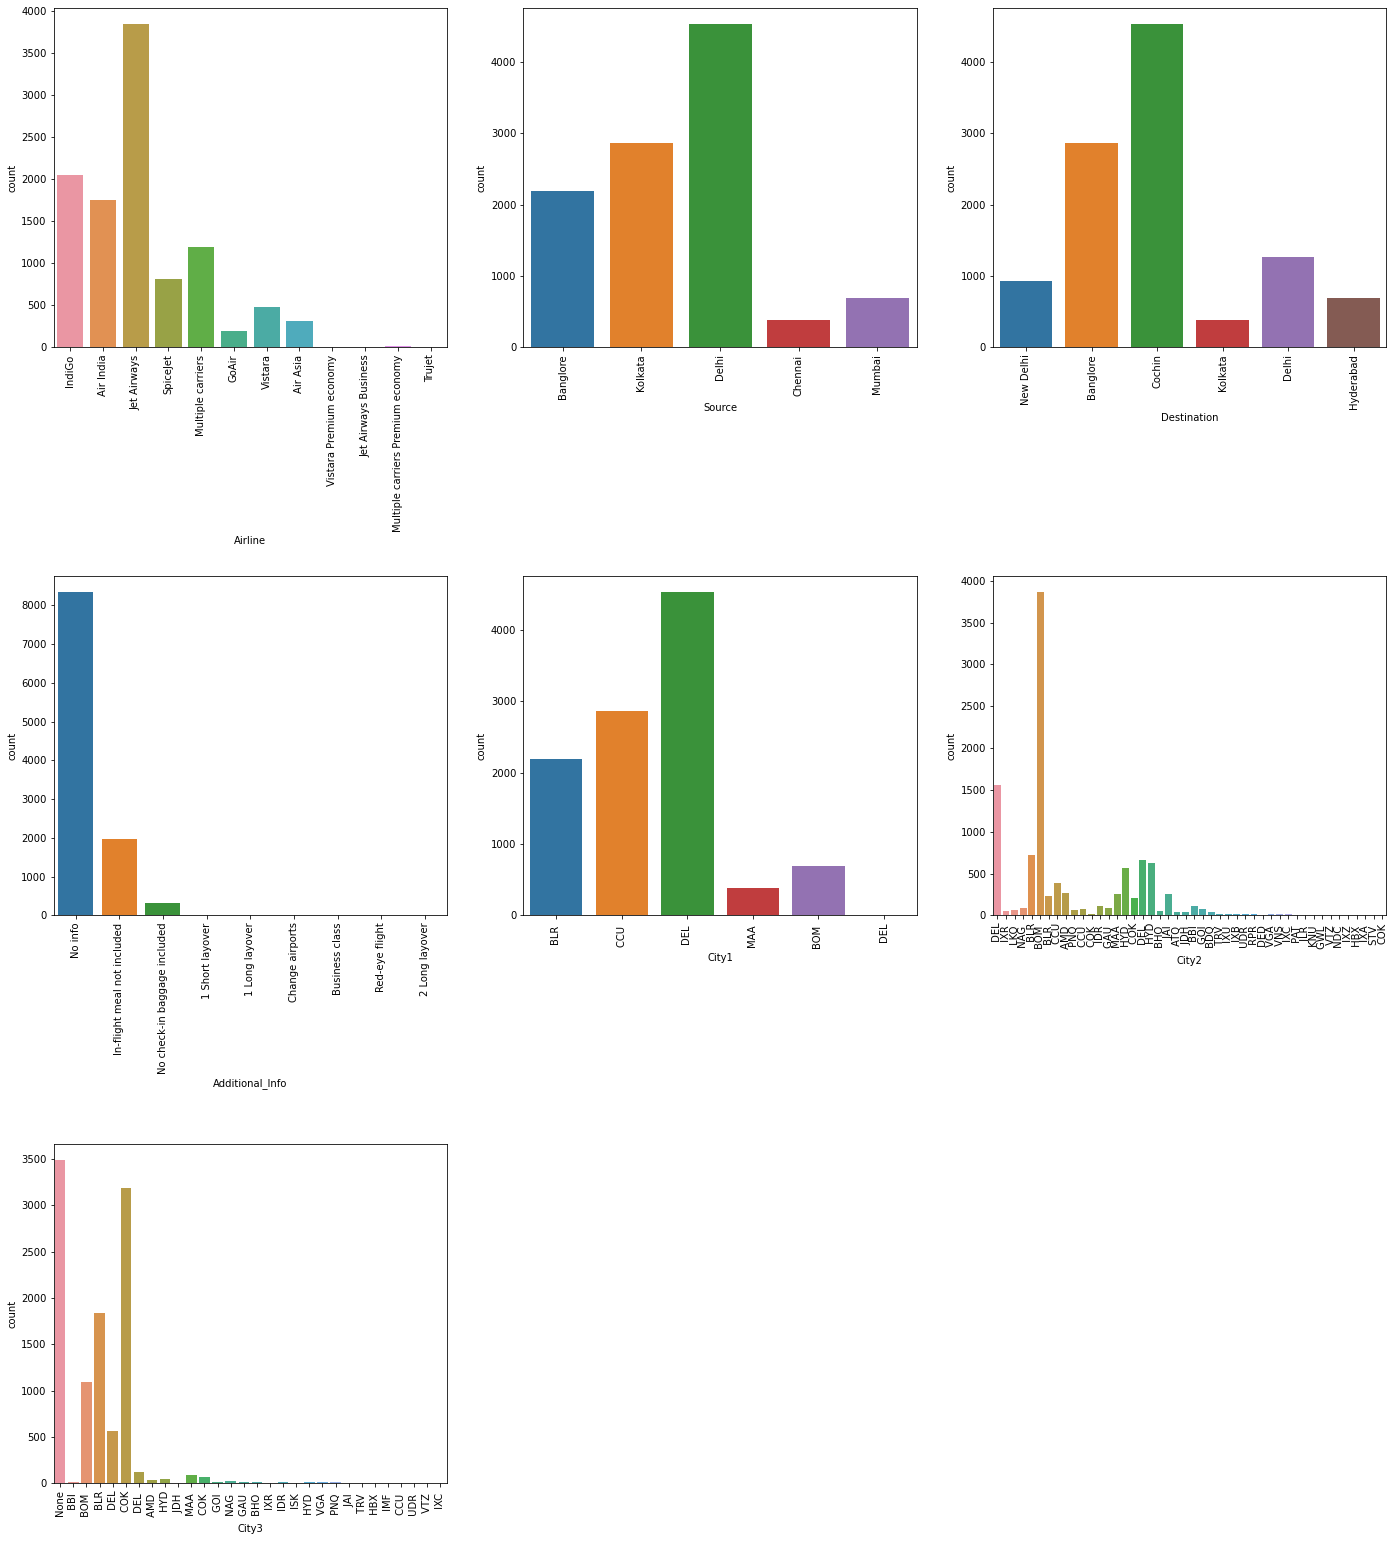

In [890]:
c=1
plt.figure(figsize=(20,45))

for i in categorical:
    plt.subplot(6,3,c)
    sns.countplot(data[i])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()

### Observations 

#### Airlines
- Jet Airways is the most preferred airline with the highest row count, followed by Indigo and AirIndia.
- Count for Vistara Premium economy, Trujet, Multiple carries premium economy and Jet airways business is quite low.

#### Source
- Majority of the flights take off from Delhi
- Chennai has the minimum count of flight take-offs

#### Destination 
- Maximum flights land in Cochin
- Kolkata has the lowest count of receiving the flights

#### Additional Info 
- Maximum rows have No info as the value.
- We need to check how this column impacts the prices

#### City1
- City1 has same data as source column
- An additional value has been observed for ' DEL', there is an extra Space in the name, count for this is 0. We will drop this column.

#### City2
- Majority of the flights take a stop in Bombay.
- There are many cities with a very low count for stops. We will check how flights with 1stop impact prices of flights, and if any relation is there with stop place.

#### City3
- Majority of the flights have no 2nd stop
- If there is a second stop, chances are high of the place being Cochin.

### Exploring numerical columns

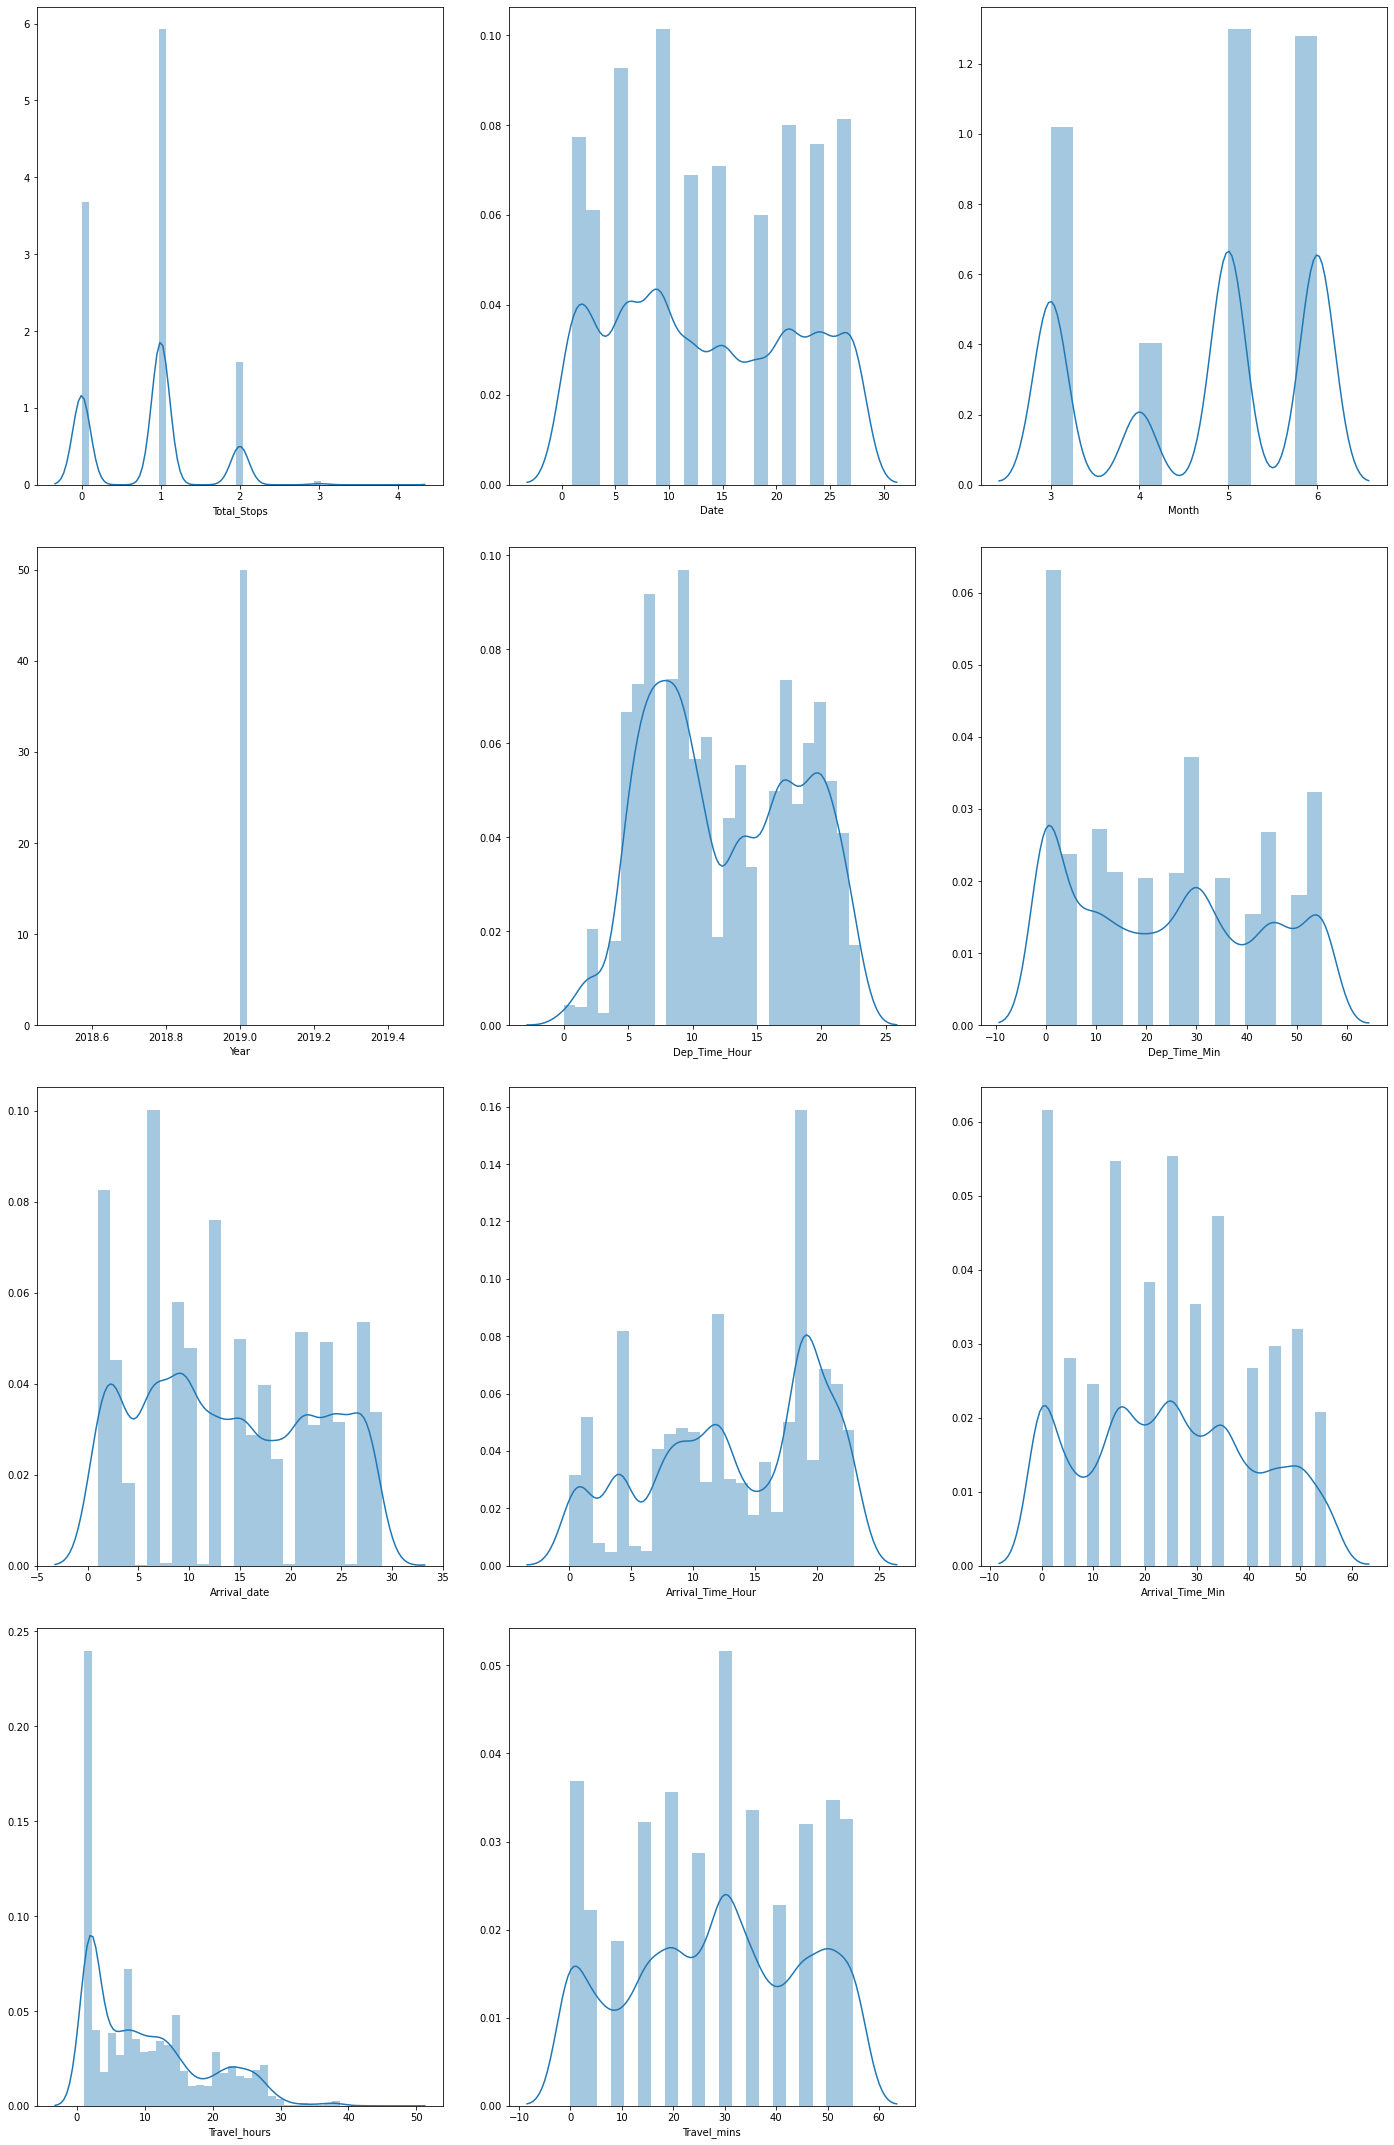

In [891]:
c=1
plt.figure(figsize=(20,45))

for i in numerical:
    plt.subplot(6,3,c)
    sns.distplot(data[i])
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()

# Observations 

#### Total stops
- Majority of the flights have stops as 1, flights with 3 and 4 stops are quite low

#### Date 
- There are no specific dates when the flights travel, the distribution is almost similar for all dates

#### Month
- People tend to travel less in April
- Flights in May and June have a higher count, seems like people travel during holiday months

#### Year
- This column has only 2019 as a value and can be dropped

#### Dep_Time_Hour
- Majority of the flights tend to fly in the early morning time
- Count of flights taking off during 16:00 - 23:00 is also high, Afternoon flights are less in number.

#### Dep_Time_Min
- Most flights take off at whole hours (Mins as 00)

#### Arrival date
- In majority of the cases, flights take off and land on the same day

#### Arrival time hour
- Majority of the flights reach its destination in the evening time around 18:00-19:00 
- This seems to be because majority of the flights have take off times in the morning and hence land after the flight time

#### Arrival time min
- This distribution is similar and does not give out any dedicated information

#### Travel hours
- Majority of the flights have travel time for around 2-3 hours, which seems ok since these are domestic flights
- Some flights have time around 30 hours too, this could be because of the number of stops in between

#### Travel mins 
- The data is divided and is not pointing towards any specific points


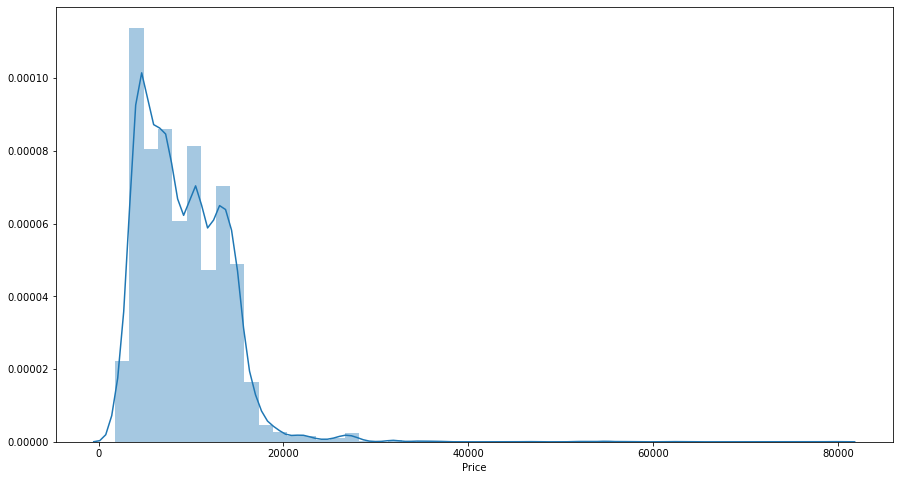

In [892]:
plt.figure(figsize = (15,8))
sns.distplot(data.Price)

#### Observation -

- Majority of the flights have price 0 - 25k.
- Price range is skewed towards right.
- Flights with prices above 30k are quite low.

### Bivariate analysis

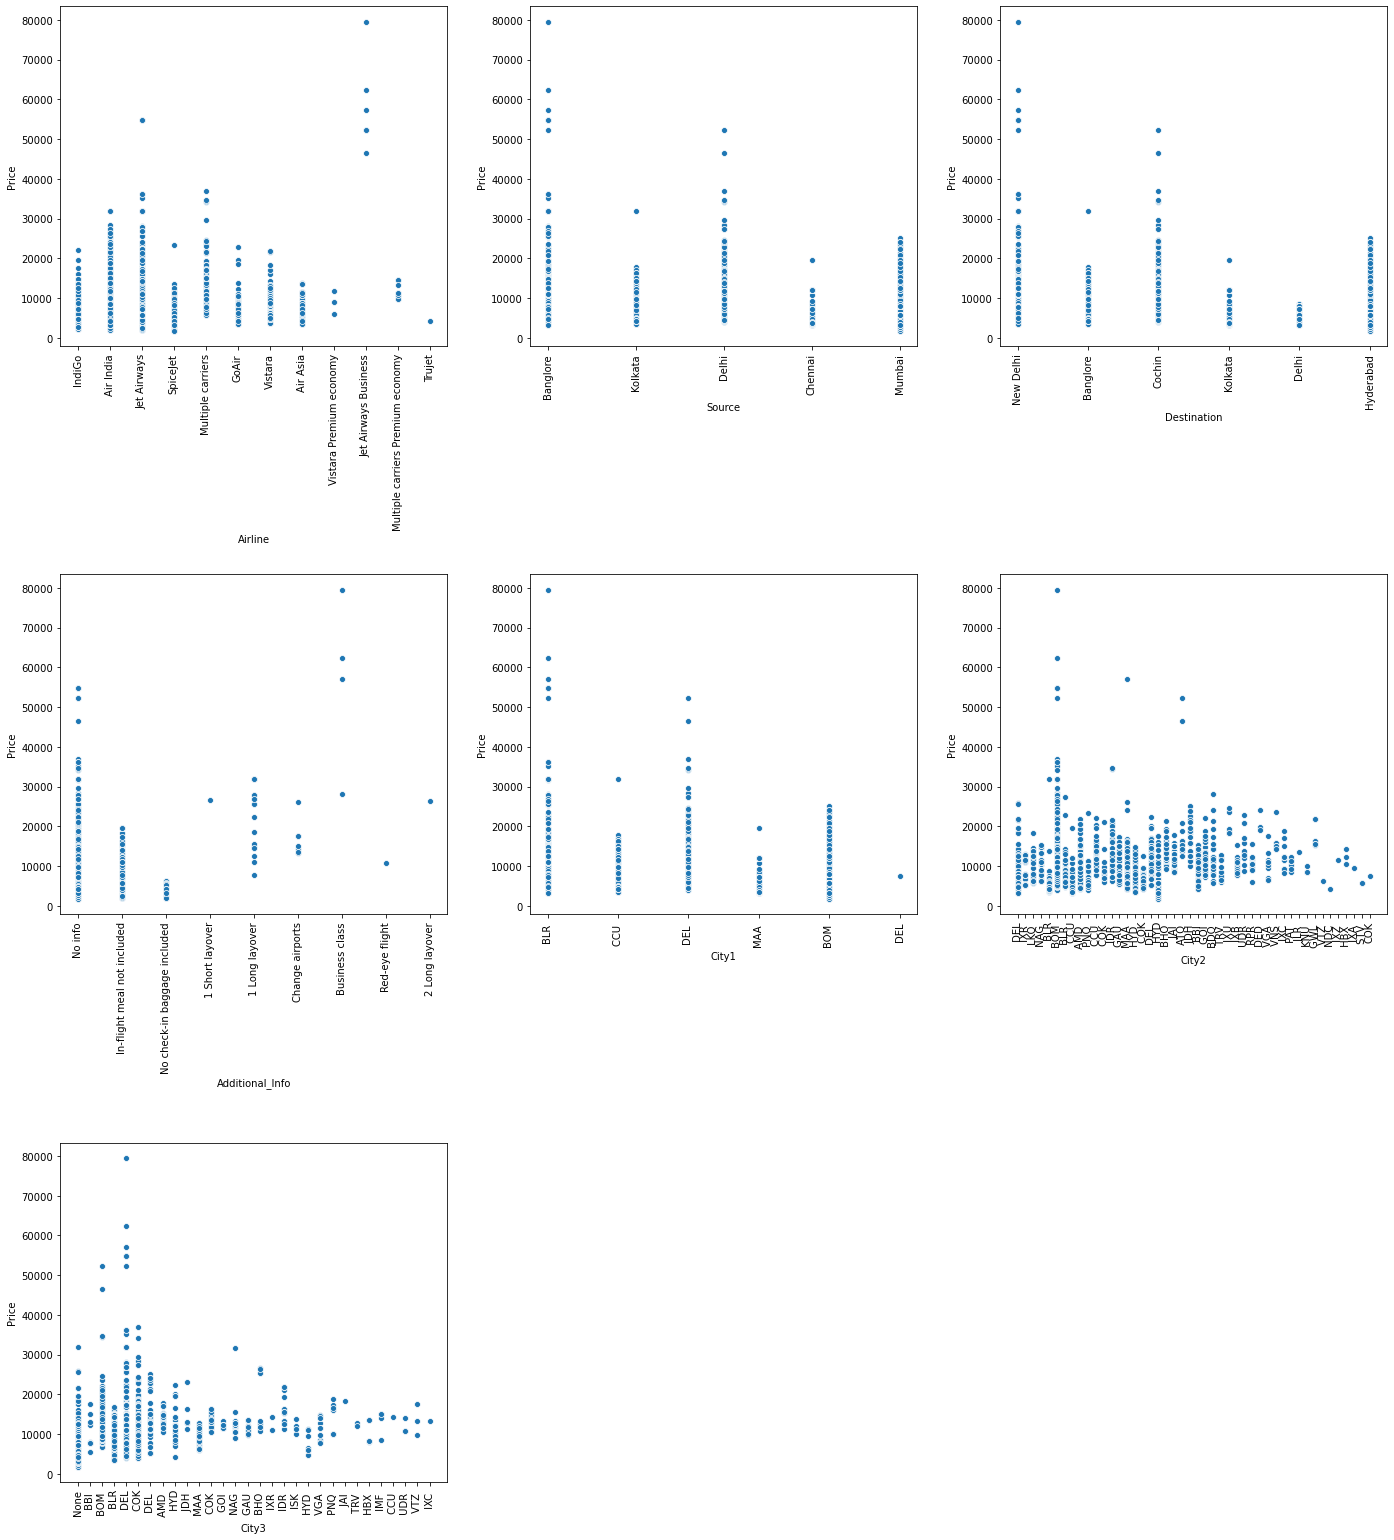

In [893]:
# Checking for relation of prices with categorical data

c=1
plt.figure(figsize=(20,45))

for i in categorical:
    plt.subplot(6,3,c)
    sns.scatterplot(x = data[i], y = data.Price )
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()

### Observations

- Jet airways business class has the highest prices between 50k - 80k
- All the high cost flights depart from bangalore, rest of the flights have prices between 3k - 50k
- All high cost flights have destination as Delhi, rest of the flights have prices between 3k - 50k
- If a flight is of business class, its price would be high
- The flights with high prices having 1 stop, have stop in Bombay
- Flights with 2 stops, having higher prices, have stop in Delhi.

In [894]:
#Checking flights with high prices

data[data.Price>=50000]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
657,Jet Airways Business,Banglore,New Delhi,1,No info,52229,1,3,2019,BLR,BOM,DEL,5,45,1,10,45,5,0
1478,Jet Airways,Banglore,New Delhi,1,No info,54826,18,3,2019,BLR,BOM,DEL,18,40,16,0,45,6,5
2618,Jet Airways,Banglore,New Delhi,1,No info,54826,18,3,2019,BLR,BOM,DEL,22,50,16,5,5,6,15
2924,Jet Airways Business,Banglore,New Delhi,1,Business class,79512,1,3,2019,BLR,BOM,DEL,5,45,1,11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,1,Business class,62427,1,3,2019,BLR,BOM,DEL,5,45,1,12,25,6,40
5439,Jet Airways,Banglore,New Delhi,1,No info,54826,1,3,2019,BLR,BOM,DEL,16,55,1,23,0,6,5
9715,Jet Airways Business,Delhi,Cochin,2,No info,52285,6,3,2019,DEL,ATQ,BOM,20,5,7,4,25,8,20
10364,Jet Airways Business,Banglore,New Delhi,1,Business class,57209,1,3,2019,BLR,MAA,DEL,9,45,1,14,25,4,40


### Observation 

- We observe that the flights with high prices are 8 in number.
- Majority of these flights fly from the same route - BLR->BOM->DEL
- Majority of the flights belong to Business class
- All the flights have Airlines as Jet airways.
- All of these flights took flight in March


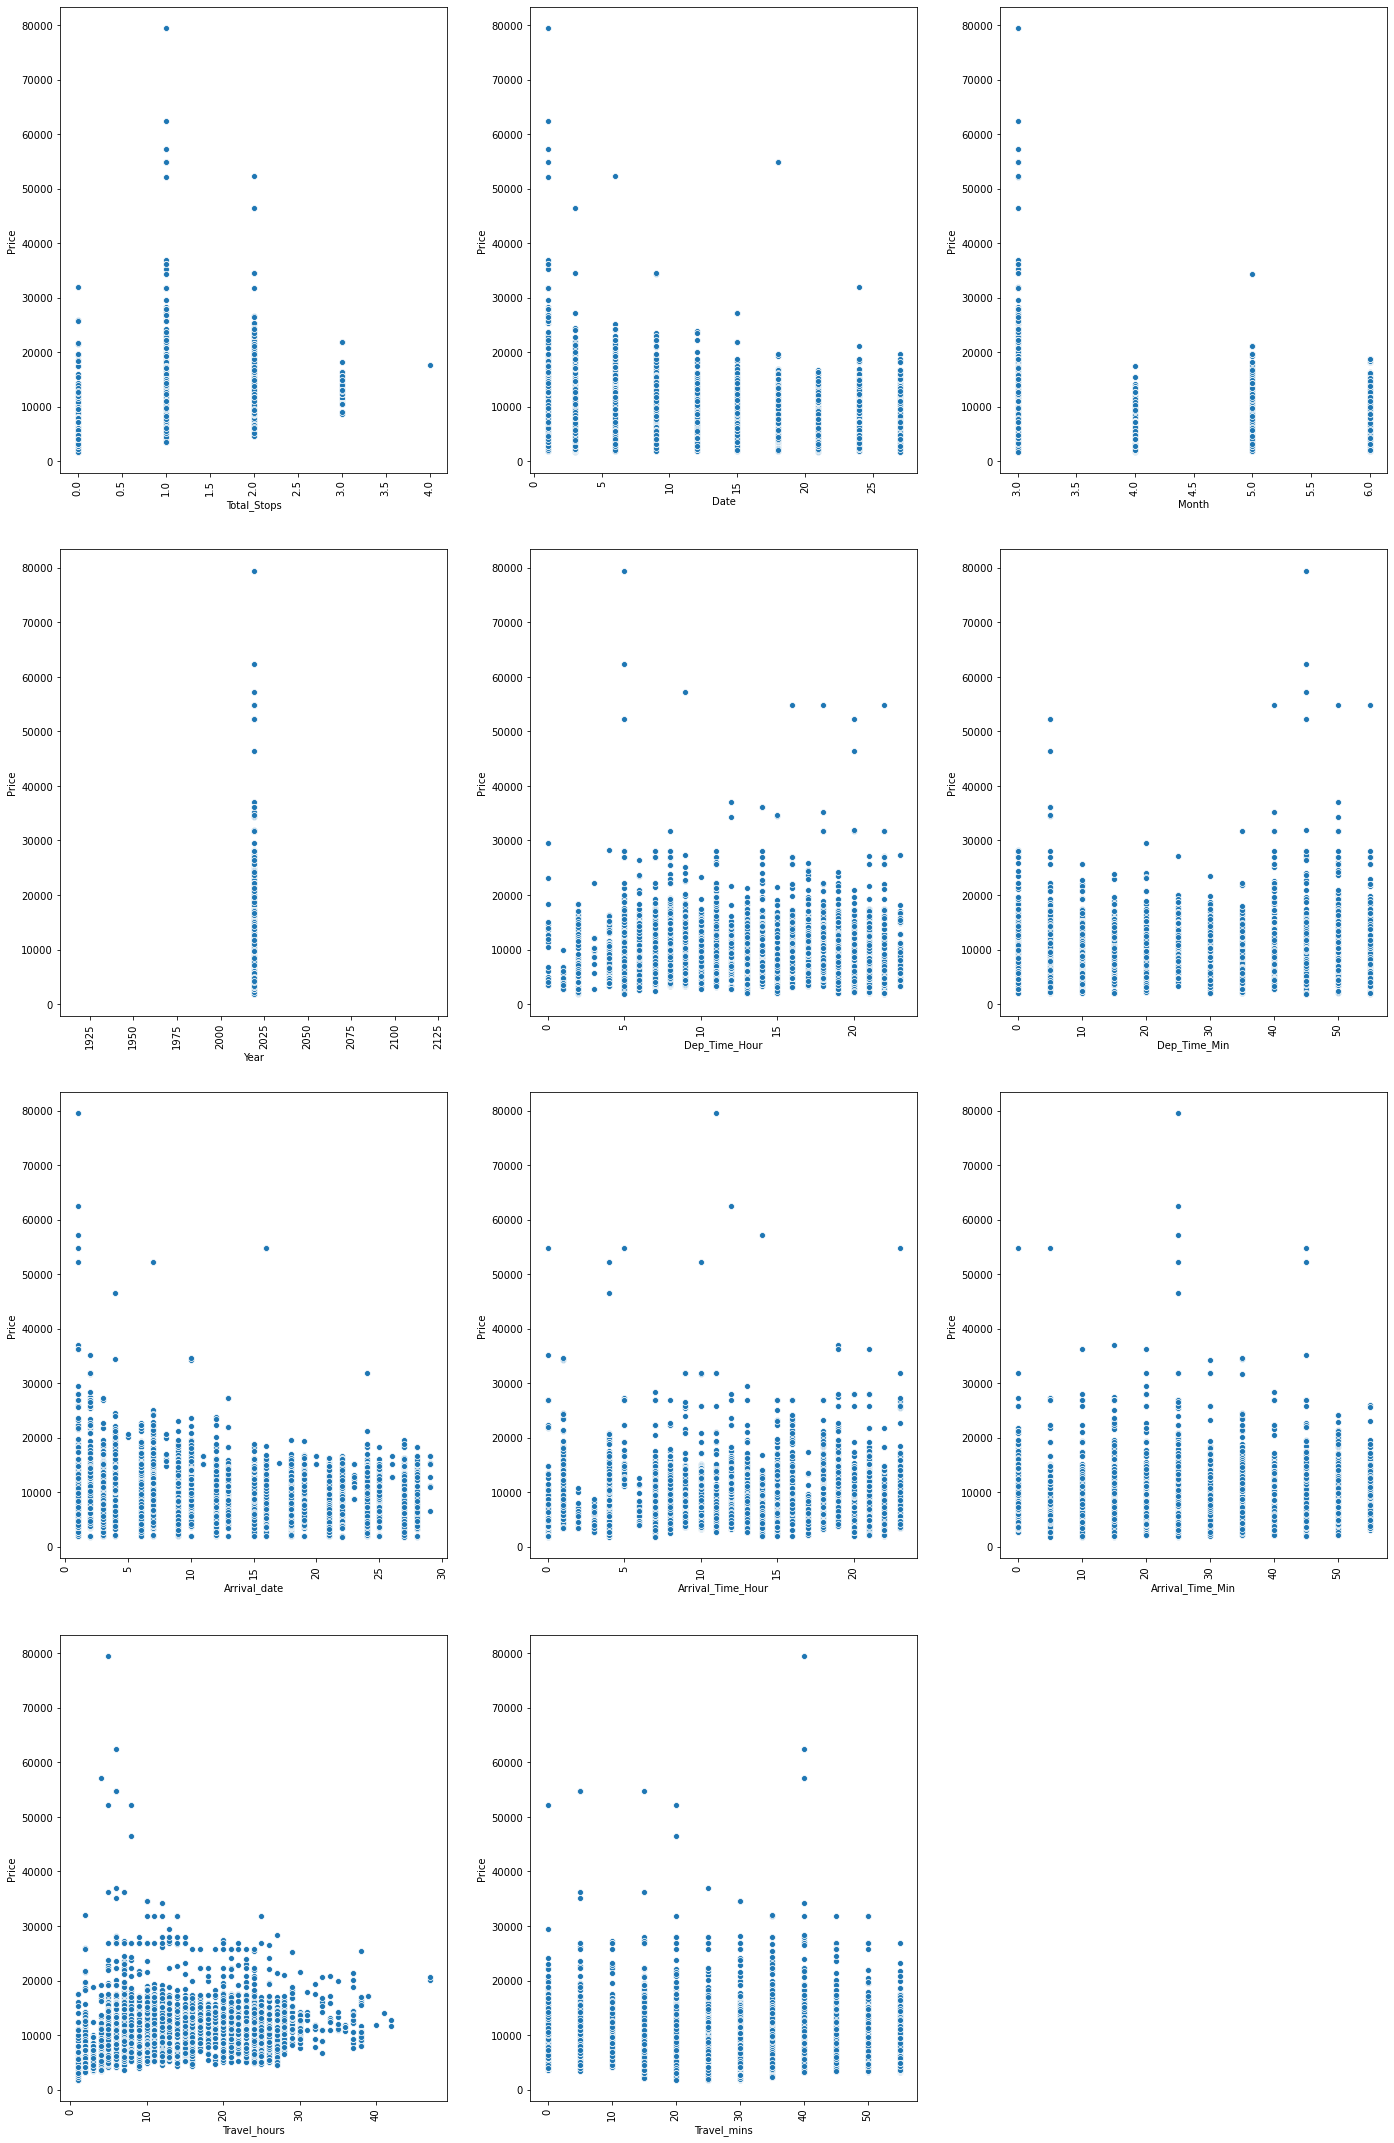

In [895]:
#Checking relation of price with numerical columns

c=1
plt.figure(figsize=(20,45))

for i in numerical:
    plt.subplot(6,3,c)
    sns.scatterplot(x = data[i], y = data.Price )
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 3.0)
    c=c+1
plt.show()

### Observations

- As number of stops increase, the price range gets decreasing into a smaller price window (10k - 22k)
- High price flights are lesser during end of month
- Prices are higher in the month of March
- With increase in travel hours, price increases, but the number of flights decrease.

### Dropping the unnecessary columns which are not impacting the price of the flights

In [896]:
data.drop(['Dep_Time_Min','Arrival_Time_Min','Travel_mins','Year', 'City1'], axis =1, inplace = True)

In [897]:
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,City2,City3,Dep_Time_Hour,Arrival_date,Arrival_Time_Hour,Travel_hours
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,DEL,None,22,22,1,2
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,IXR,BBI,5,1,13,7
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,LKO,BOM,9,10,4,19
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,NAG,BLR,18,12,23,5
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,NAG,DEL,16,1,21,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,BLR,None,19,9,22,2
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,BLR,None,20,27,23,2
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,DEL,None,8,27,11,3
10681,Vistara,Banglore,New Delhi,0,No info,12648,1,3,DEL,None,11,1,14,2


We have received our final set of data to further treat.

## Checking outliers using boxplot

In [898]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10682 non-null  int64 
 4   Additional_Info    10682 non-null  object
 5   Price              10682 non-null  int64 
 6   Date               10682 non-null  int64 
 7   Month              10682 non-null  int64 
 8   City2              10682 non-null  object
 9   City3              10682 non-null  object
 10  Dep_Time_Hour      10682 non-null  int64 
 11  Arrival_date       10682 non-null  int64 
 12  Arrival_Time_Hour  10682 non-null  int64 
 13  Travel_hours       10682 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.5+ MB


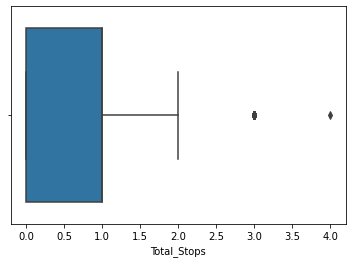

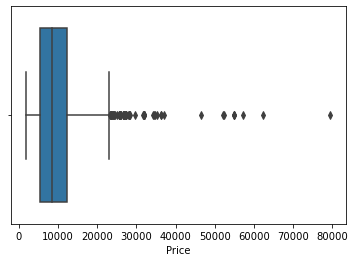

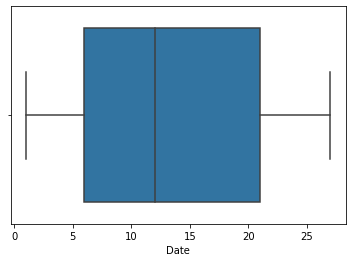

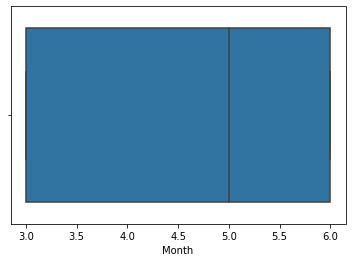

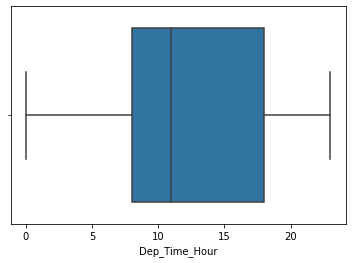

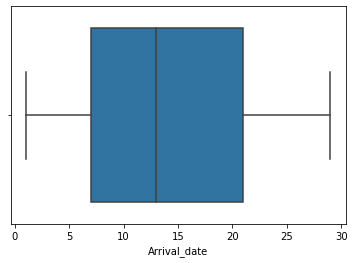

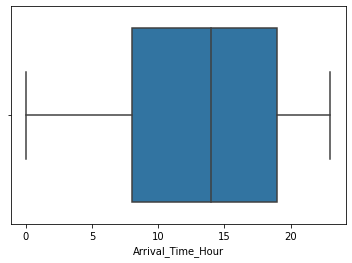

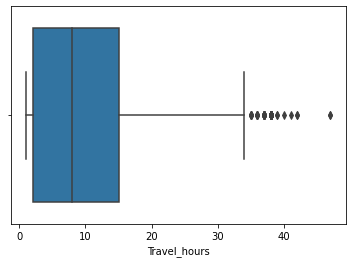

In [899]:
for i in data.columns:
    if data[i].dtype == 'int64':
        sns.boxplot(data[i])
        plt.show()

### Observation

- Outliers are present in Total hours, Total stops and price
- We will not remove the data with high prices since it is our target variable
- Not removing outliers total stops since price is impacted by number of stops
- We will not remove the data with high number of hours, number of increase in hours shows a price pattern in the above graphs plotted for EDA. We will treat skewness for this data

### Skewness treatment

In [900]:
data.skew()

Total_Stops          0.317345
Price                1.813248
Date                 0.118174
Month               -0.387708
Dep_Time_Hour        0.113224
Arrival_date         0.119667
Arrival_Time_Hour   -0.369876
Travel_hours         0.850822
dtype: float64

In [901]:
#Using log transform to treat skewness in the data

data.Travel_hours = np.log(data.Travel_hours)

In [902]:
data.Travel_hours.skew()

-0.26612233332369917

Skewness in relevant columns has successfully been treated.

# Encoding the categorical data

In [903]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [904]:
for i in data.columns:
    if data[i].dtypes == 'object':
        print(i)
        data[i] = le.fit_transform(data[i])

Airline
Source
Destination
Additional_Info
City2
City3


In [905]:
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,City2,City3,Dep_Time_Hour,Arrival_date,Arrival_Time_Hour,Travel_hours
0,3,0,5,0,7,3897,24,3,13,29,22,22,1,0.693147
1,1,3,0,2,7,7662,1,5,25,1,5,1,13,1.945910
2,4,2,1,2,7,13882,9,6,32,4,9,10,4,2.944439
3,3,3,0,1,7,6218,12,5,34,3,18,12,23,1.609438
4,3,0,5,1,7,13302,1,3,34,8,16,1,21,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,7,4107,9,4,5,29,19,9,22,0.693147
10679,1,3,0,0,7,4145,27,4,5,29,20,27,23,0.693147
10680,4,0,2,0,7,7229,27,4,13,29,8,27,11,1.098612
10681,10,0,5,0,7,12648,1,3,13,29,11,1,14,0.693147


# Scaling the data

In [906]:
#Lets bring all features to a common scale using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [907]:
ds_x = data.drop('Price', axis = 1)
y = data['Price']

In [908]:
dataset = sc.fit_transform(ds_x)

x = pd.DataFrame(dataset,columns=ds_x.columns)

In [909]:
x

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,City2,City3,Dep_Time_Hour,Arrival_date,Arrival_Time_Hour,Travel_hours
0,-0.410805,-1.658435,2.416778,-1.220477,0.498649,1.237288,-1.467707,0.137204,1.395015,1.654268,0.955750,-1.800319,-1.183304
1,-1.261152,0.890299,-0.973732,1.741835,0.498649,-1.475307,0.250153,1.634890,-1.082280,-1.303000,-1.524648,-0.050813,0.052178
2,0.014369,0.040721,-0.295630,1.741835,0.498649,-0.531796,1.109082,2.508541,-0.816856,-0.607172,-0.461621,-1.362943,1.036933
3,-0.410805,0.890299,-0.973732,0.260679,0.498649,-0.177979,0.250153,2.758155,-0.905330,0.958440,-0.225392,1.407109,-0.279653
4,-0.410805,-1.658435,2.416778,0.260679,0.498649,-1.475307,-1.467707,2.758155,-0.462956,0.610527,-1.524648,1.115525,-0.499718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.686326,0.890299,-0.973732,-1.220477,0.498649,-0.531796,-0.608777,-0.861254,1.395015,1.132397,-0.579735,1.261317,-1.183304
10678,-1.261152,0.890299,-0.973732,-1.220477,0.498649,1.591104,-0.608777,-0.861254,1.395015,1.306354,1.546321,1.407109,-1.183304
10679,0.014369,-1.658435,0.382472,-1.220477,0.498649,1.591104,-0.608777,0.137204,1.395015,-0.781129,1.546321,-0.342397,-0.783432
10680,2.565411,-1.658435,2.416778,-1.220477,0.498649,-1.475307,-1.467707,0.137204,1.395015,-0.259258,-1.524648,0.094979,-1.183304


We have successfully transformed our data to a similar scale

# Fitting the regression models

In [910]:
#Importing the ML models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [911]:
#Creating objects for the data models

dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()
lr = LinearRegression()

In [912]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
for i in [dt, svr, knn, lr]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test, pred)
    train_score = r2_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.1:
        print(i)
        #print('At random state ',)
        print('R2 score is ',r2_score(y_test, pred))
        print('R2 for train data', r2_score(y_train,i.predict(x_train)))
        print('Mean absolute error is ',mean_absolute_error(y_test, pred))
        print('Mean squared error is ', mean_squared_error(y_test, pred))
        print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
        print('------------------------------------------')

SVR()
R2 score is  0.060432458295951674
R2 for train data 0.05381545789557374
Mean absolute error is  3360.839385854819
Mean squared error is  19019637.68217035
Root mean squared error is  4361.1509584248915
------------------------------------------
KNeighborsRegressor()
R2 score is  0.8174808738051536
R2 for train data 0.8441602372484935
Mean absolute error is  1129.2776911076444
Mean squared error is  3694729.219781591
Root mean squared error is  1922.1678438111462
------------------------------------------
LinearRegression()
R2 score is  0.5143383642868746
R2 for train data 0.4883941656291312
Mean absolute error is  2266.0073601447602
Mean squared error is  9831233.985202333
Root mean squared error is  3135.479865220367
------------------------------------------


### Observation

- We receive the best score using Kneighbors regressor, with an r2 score of 81%.
- Mean absolute error for the model is the least ~1130
- Root mean square error for the model is ~1922.

# Ensemble methods

In [913]:
#Importing the random forest regressor

from sklearn.ensemble import RandomForestRegressor

In [914]:
rfr = RandomForestRegressor()

In [915]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state =100)
for i in [rfr]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test, pred)
    train_score = r2_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.2:
        print(i)
        #print('At random state ',)
        print('R2 score is ',r2_score(y_test, pred))
        print('R2 for train data', r2_score(y_train,i.predict(x_train)))
        print('Mean absolute error is ',mean_absolute_error(y_test, pred))
        print('Mean squared error is ', mean_squared_error(y_test, pred))
        print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
        print('------------------------------------------')

RandomForestRegressor()
R2 score is  0.870483552501648
R2 for train data 0.9731061643357956
Mean absolute error is  731.7359821360474
Mean squared error is  2662559.4311529202
Root mean squared error is  1631.7350983394701
------------------------------------------


In [916]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [917]:
ad = AdaBoostRegressor()
gd = GradientBoostingRegressor()

In [918]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
for i in [ad, gd]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test, pred)
    train_score = r2_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.2:
        print(i)
        #print('At random state ',)
        print('R2 score is ',r2_score(y_test, pred))
        print('R2 for train data', r2_score(y_train,i.predict(x_train)))
        print('Mean absolute error is ',mean_absolute_error(y_test, pred))
        print('Mean squared error is ', mean_squared_error(y_test, pred))
        print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))
        print('------------------------------------------')

AdaBoostRegressor()
R2 score is  0.23403219987719792
R2 for train data 0.32089461929370766
Mean absolute error is  3288.2946784130936
Mean squared error is  15505463.298703056
Root mean squared error is  3937.697715506239
------------------------------------------
GradientBoostingRegressor()
R2 score is  0.8481238993980145
R2 for train data 0.8368245625111573
Mean absolute error is  1234.328718144648
Mean squared error is  3074423.3680014685
Root mean squared error is  1753.4033671695365
------------------------------------------


### Observation

Random Forest model gives us the best accuracy here, with an R2 score of 87%, but the model is overfitting on train data.
We will try to tune this model to check if we can remove overfitting.
Mean Absolute error for this model is ~723 and RMSE ~ 1607.

Gradient boosting also gives a score of 84%, which is better than K-Neighbors and the model is not overfitting as well.
The model has mean absolute error as ~1234 and RMSE as ~1753 (near to Random forest)

# Cross validation of Random forest and gradient boosting models

In [919]:
#Importing cross val score from Model_selection

from sklearn.model_selection import cross_val_score

In [920]:
for i in range(2,9):
    cv = cross_val_score(rfr, x, y, cv=i)
    print(rfr, cv.mean())

RandomForestRegressor() 0.850088986045737
RandomForestRegressor() 0.8509890754607671
RandomForestRegressor() 0.8632523785994594
RandomForestRegressor() 0.8737986720643247
RandomForestRegressor() 0.8735253761881144
RandomForestRegressor() 0.8696066909504417
RandomForestRegressor() 0.8704493616951844


In [921]:
for i in range(2,9):
    cv = cross_val_score(gd, x, y, cv=i)
    print(gd, cv.mean())

GradientBoostingRegressor() 0.8215159916038594
GradientBoostingRegressor() 0.8226309812004814
GradientBoostingRegressor() 0.8271720678925791
GradientBoostingRegressor() 0.830176263886848
GradientBoostingRegressor() 0.8278858495393197
GradientBoostingRegressor() 0.8252888662619488
GradientBoostingRegressor() 0.8294679468671291


Random forest gives a cross val score of ~86%, trying to hypertune this model further.

We will also hypertune Gradient Boosting to check if performance increases

# Hypertuning the best model

In [922]:
from sklearn.model_selection import GridSearchCV

In [923]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [924]:
param_grid = {'n_estimators':[10, 30, 50, 70, 100], 'max_depth':[None,1,2,3], 'max_samples' : [50,100,250,500,1000], 'min_samples_split':[2,4,10]}

gcv_rfr = GridSearchCV(rfr,param_grid, cv=3)

In [925]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100)

In [926]:
#Fitting the model

res = gcv_rfr.fit(x_train,y_train)

In [927]:
#Checking best params

res.best_params_

{'max_depth': None,
 'max_samples': 1000,
 'min_samples_split': 2,
 'n_estimators': 100}

In [928]:
res.best_score_

0.825097566063126

In [929]:
gd.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [930]:
param_grid2 = {'alpha': [0.9,0.09,0.1],'learning_rate': [0.1,0.01],'max_depth': [3,4,5], 'min_samples_leaf': [1,2,3], 'min_samples_split': [2,3,4], 'n_estimators': [100,50,10]}

In [931]:
gcv_gd = GridSearchCV(gd,param_grid2, cv=3)

In [932]:
#Fitting the model

res2 = gcv_gd.fit(x_train,y_train)

In [933]:
res2.best_params_

{'alpha': 0.09,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [934]:
res2.best_score_

0.8606582413037528

We were able to hypertune our Gradient Boosting model to provide 86% accuracy, higher than Random forest.

Hence we proceed with Gradient Boosting as our final model.

# Creating a tuned model

In [935]:
#Creating model instance with best params

model = GradientBoostingRegressor(alpha=0.09, learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

In [936]:
#Fitting the final model

model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.09, max_depth=5)

In [937]:
#Prediction using the final model

pred = model.predict(x_test)

In [938]:
print('R2 score for test data is ',r2_score(y_test, pred))
print('R2 for train data', r2_score(y_train,model.predict(x_train)))
print('Mean absolute error is ',mean_absolute_error(y_test, pred))
print('Mean squared error is ', mean_squared_error(y_test, pred))
print('Root mean squared error is ',(mean_squared_error(y_test, pred, squared=False)))

R2 score for test data is  0.870808386599493
R2 for train data 0.9144685033282565
Mean absolute error is  975.9733474815606
Mean squared error is  2655881.5913303895
Root mean squared error is  1629.687574761


# Saving the best model using joblib

In [939]:
import joblib

joblib.dump(model, 'flight_price.obj')

['flight_price.obj']

# Comparing the predicted and actual prices

In [940]:
#Creating a dataframe with actual and predicted values

predicted_values = pd.DataFrame({'Actual':y_test,'Predicted':pred})

In [941]:
predicted_values

,Actual,Predicted
8161,10703,10588.869238
6423,13587,10804.367668
3102,12819,14140.445786
5797,8610,8960.063030
7180,14714,14131.448592
...,...,...
2216,3210,3738.333383
5327,1965,2274.839825
5663,8479,8443.645208
6160,11467,13593.043350


### Observation

We observed that majority of the values predicted are near to the expected price, hence our model is able to predict quite well.

# Loading and modifying the test file

In [942]:
test = pd.read_excel('Flight_test.xlsx', sheet_name='Sheet1')

In [943]:
test.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
1081,Jet Airways,6/04/2019,Banglore,Delhi,BLR → DEL,17:45,20:45,3h,non-stop,In-flight meal not included
319,Air India,15/05/2019,Kolkata,Banglore,CCU → BBI → BLR,09:10,13:15,4h 5m,1 stop,No info
2064,Jet Airways,21/03/2019,Delhi,Cochin,DEL → MAA → BOM → COK,19:15,18:50 22 Mar,23h 35m,2 stops,In-flight meal not included
1210,IndiGo,24/04/2019,Banglore,Delhi,BLR → DEL,07:10,10:05,2h 55m,non-stop,No info
1280,Jet Airways,18/06/2019,Banglore,Delhi,BLR → DEL,17:45,20:45,3h,non-stop,In-flight meal not included
618,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → DEL → BLR,17:00,18:00 19 May,25h,1 stop,No info
202,Air India,24/03/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25,07:55 25 Mar,22h 30m,1 stop,No info
966,Air India,6/03/2019,Mumbai,Hyderabad,BOM → VGA → TIR → HYD,08:00,18:10,10h 10m,2 stops,No info
234,IndiGo,18/05/2019,Banglore,Delhi,BLR → DEL,00:30,03:25,2h 55m,non-stop,No info
1260,Air India,15/06/2019,Delhi,Cochin,DEL → BOM → COK,13:00,07:40 16 Jun,18h 40m,1 stop,No info


In [944]:
# Applying the relevant operations on test data

In [945]:
#Treating the date column

test.Date_of_Journey = test.Date_of_Journey.str.split('/')

test['Date'] = test.Date_of_Journey.str[0]
test['Month'] = test.Date_of_Journey.str[1]


In [946]:


#Treating route column

test.Route = test.Route.str.split('→')

test['City2'] = test.Route.str[1]
test['City3'] = test.Route.str[2]


In [947]:

#Treating dep time column

test.Dep_Time = test.Dep_Time.str.split(':')

test['Dep_Time_Hour'] = test.Dep_Time.str[0]

In [948]:
#Treating the arrival time column

test.Arrival_Time = test.Arrival_Time.str.split(' ')
test['Arrival_date'] = test.Arrival_Time.str[1]
test['Time_of_arrival'] = test.Arrival_Time.str[0]
test['Time_of_arrival'] = test.Time_of_arrival.str.split(':')
test['Arrival_Time_Hour'] = test.Time_of_arrival.str[0]


In [949]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            2671 non-null   object
 1   Date_of_Journey    2671 non-null   object
 2   Source             2671 non-null   object
 3   Destination        2671 non-null   object
 4   Route              2671 non-null   object
 5   Dep_Time           2671 non-null   object
 6   Arrival_Time       2671 non-null   object
 7   Duration           2671 non-null   object
 8   Total_Stops        2671 non-null   object
 9   Additional_Info    2671 non-null   object
 10  Date               2671 non-null   object
 11  Month              2671 non-null   object
 12  City2              2671 non-null   object
 13  City3              1822 non-null   object
 14  Dep_Time_Hour      2671 non-null   object
 15  Arrival_date       1066 non-null   object
 16  Time_of_arrival    2671 non-null   object


In [950]:

#Treating the duration column

test.Duration = test.Duration.str.split(' ')
test['Travel_hours'] = test.Duration.str[0]

test['Travel_hours'] = test['Travel_hours'].str.split('h')
test['Travel_hours'] = test['Travel_hours'].str[0]

In [951]:

#Treating the Total Stops column

test.Total_Stops.replace('non-stop','0', inplace = True)
test.Total_Stops = test.Total_Stops.str.split(' ')
test.Total_Stops = test.Total_Stops.str[0]

In [952]:
#Changing additional info column
test.Additional_Info.replace('No Info', 'No info', inplace = True)

In [953]:
#Dropping extra columns

test.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration', 'Time_of_arrival'], axis =1, inplace = True)


In [954]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            2671 non-null   object
 1   Source             2671 non-null   object
 2   Destination        2671 non-null   object
 3   Total_Stops        2671 non-null   object
 4   Additional_Info    2671 non-null   object
 5   Date               2671 non-null   object
 6   Month              2671 non-null   object
 7   City2              2671 non-null   object
 8   City3              1822 non-null   object
 9   Dep_Time_Hour      2671 non-null   object
 10  Arrival_date       1066 non-null   object
 11  Arrival_Time_Hour  2671 non-null   object
 12  Travel_hours       2671 non-null   object
dtypes: object(13)
memory usage: 271.4+ KB


In [955]:
# Filling NaN values

test.City3.fillna('None', inplace = True)
test.Arrival_date.fillna(test['Date'], inplace = True)

In [956]:
test.isnull().sum()

Airline              0
Source               0
Destination          0
Total_Stops          0
Additional_Info      0
Date                 0
Month                0
City2                0
City3                0
Dep_Time_Hour        0
Arrival_date         0
Arrival_Time_Hour    0
Travel_hours         0
dtype: int64

In [957]:
#Changing data type of numerical columns from object to int

test[test.Travel_hours == '5m']


,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,City2,City3,Dep_Time_Hour,Arrival_date,Arrival_Time_Hour,Travel_hours
2660,Air India,Mumbai,Hyderabad,2,No info,12,03,GOI,PNQ,16,12,16,5m


In [958]:
test.drop(index = 2660, axis = 0, inplace = True)

In [959]:
test.Total_Stops = test.Total_Stops.astype('int64')
test.Date = test.Date.astype('int64')
test.Month = test.Month.astype('int64')
test.Dep_Time_Hour = test.Dep_Time_Hour.astype('int64')
test.Arrival_date = test.Arrival_date.astype('int64')
test.Arrival_Time_Hour = test.Arrival_Time_Hour.astype('int64')
test.Travel_hours = test.Travel_hours.astype('int64')



In [960]:
#Skewness treatment

test.skew()

Total_Stops          0.321839
Date                 0.199380
Month               -0.404578
Dep_Time_Hour        0.094352
Arrival_date         0.199796
Arrival_Time_Hour   -0.442742
Travel_hours         0.884521
dtype: float64

In [961]:
test.Travel_hours = np.log(test.Travel_hours)

In [962]:
test.skew()

Total_Stops          0.321839
Date                 0.199380
Month               -0.404578
Dep_Time_Hour        0.094352
Arrival_date         0.199796
Arrival_Time_Hour   -0.442742
Travel_hours        -0.297653
dtype: float64

In [963]:
#Encoding categorical columns

for i in test.columns:
    if test[i].dtypes == 'object':
        print(i)
        test[i] = le.fit_transform(test[i])

Airline
Source
Destination
Additional_Info
City2
City3


In [964]:
#Scaling test data

dataset = sc.fit_transform(test)

testset = pd.DataFrame(dataset,columns=test.columns)

In [965]:
testset

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,City2,City3,Dep_Time_Hour,Arrival_date,Arrival_Time_Hour,Travel_hours
0,0.011424,0.033224,-0.294489,0.248597,0.480505,-0.837219,1.094432,-0.641254,-0.659483,0.773395,-0.765978,-1.361355,0.403869
1,-0.424318,0.878054,-0.975847,0.248597,0.480505,-0.110898,0.240007,2.528056,-0.858390,-1.161081,-0.158565,-0.509112,-0.507333
2,0.011424,0.033224,-0.294489,0.248597,-2.148486,0.978584,0.240007,-0.641254,-0.659483,1.125118,1.056263,0.769254,1.232153
3,0.882908,0.033224,-0.294489,0.248597,0.480505,0.978584,0.240007,-0.641254,-0.659483,-0.809358,0.934780,1.053335,0.664776
4,-1.731545,-1.656436,0.386868,-1.239640,0.480505,1.341745,1.094432,0.223103,1.429036,1.828564,1.420711,-1.645436,-1.196631
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,-1.295802,0.878054,-0.975847,0.248597,0.480505,-0.837219,1.094432,0.367163,-0.858390,1.300980,-0.765978,0.911294,1.232153
2666,-0.424318,0.878054,-0.975847,-1.239640,0.480505,1.704906,-1.468842,-0.929373,1.429036,0.245811,1.663676,0.343132,-1.196631
2667,0.011424,0.033224,-0.294489,0.248597,0.480505,-0.837219,-1.468842,-0.641254,-0.659483,1.476841,-0.765978,-1.361355,-0.104120
2668,-1.295802,0.033224,-0.294489,0.248597,0.480505,-0.837219,-1.468842,-0.641254,-0.659483,-1.512804,-0.887461,0.769254,0.807082


# Predicting the test prices

In [966]:
#Loading the saved object

flight_price = joblib.load('flight_price.obj')

In [967]:
prices = flight_price.predict(testset)

In [968]:
#Printing the final result

prices

array([14137.44026214,  5760.86187326, 11554.97811437, ...,
       17203.89074664, 14118.47632041,  9920.10389661])

In [969]:
#Storing predicted data to dataframe

price_list = pd.DataFrame({'Price':prices})

In [970]:
price_list

,Price
0,14137.440262
1,5760.861873
2,11554.978114
3,10418.727189
4,3373.438961
...,...
2665,8198.451471
2666,4728.137735
2667,17203.890747
2668,14118.476320


# Conclusion

We have successfully created a model which predicts the price of flight with an r2 score of ~87%.